# Recursive Neural Network

### Import libraries and data

In [1]:
import numpy as np
import collections
from llm.config import DATA_DIR, IMAGES_DIR

### Data Preparation

In [2]:
from llm.core.rnn import prepare_data
from llm.core.functions import read_text_file

filepath = DATA_DIR.joinpath('Prometheus.txt')
chap_one = read_text_file(filepath)
X, y, vocab_size, max_length, tokenizer = prepare_data(chap_one)

2024-05-09 18:39:17.130332: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-09 18:39:18.276674: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/marco/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /home/marco/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/marco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Create & Train the RRN Model

In [3]:
from llm.core.rnn import create_rnn_model

model = create_rnn_model(vocab_size)
model.fit(X, y, epochs=500, verbose=1)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.0081 - loss: 4.5739 
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0519 - loss: 4.4275
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0491 - loss: 4.3592   
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0986 - loss: 4.3208
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1563 - loss: 4.2550
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1872 - loss: 4.1905
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2448 - loss: 4.1659
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2095 - loss: 4.1653
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2802 - loss: 4.0488
Epoch 10/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3568 - loss: 3.9610
Epoch 11/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4343 - loss: 3.8787
Epoch 12/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5163 

### Generate Text

In [4]:
from llm.core.rnn import generate_text

seed_text = 'The next day, Prometheus'
num_words_to_generate = 20
generated_text = generate_text(model, tokenizer, seed_text, num_words_to_generate, max_length)
generated_text

"The next day, Prometheus and the theft of fire one day zeus distributed gifts to all the gods but he didn't care much for"

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 135, 50)        │         4,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 100)            │        15,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 95)             │         9,595 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,337 (345.07 KB)

 Trainable params: 29,445 (115.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 58,892 (230.05 KB)

In [6]:
from llm.core.rnn import extract_embeddings
from llm.core.rnn import extract_sentiment_labels
from llm.core.visualization import map_labels_to_colors

embeddings, words = extract_embeddings(model, tokenizer)
category_labels = extract_sentiment_labels(words)

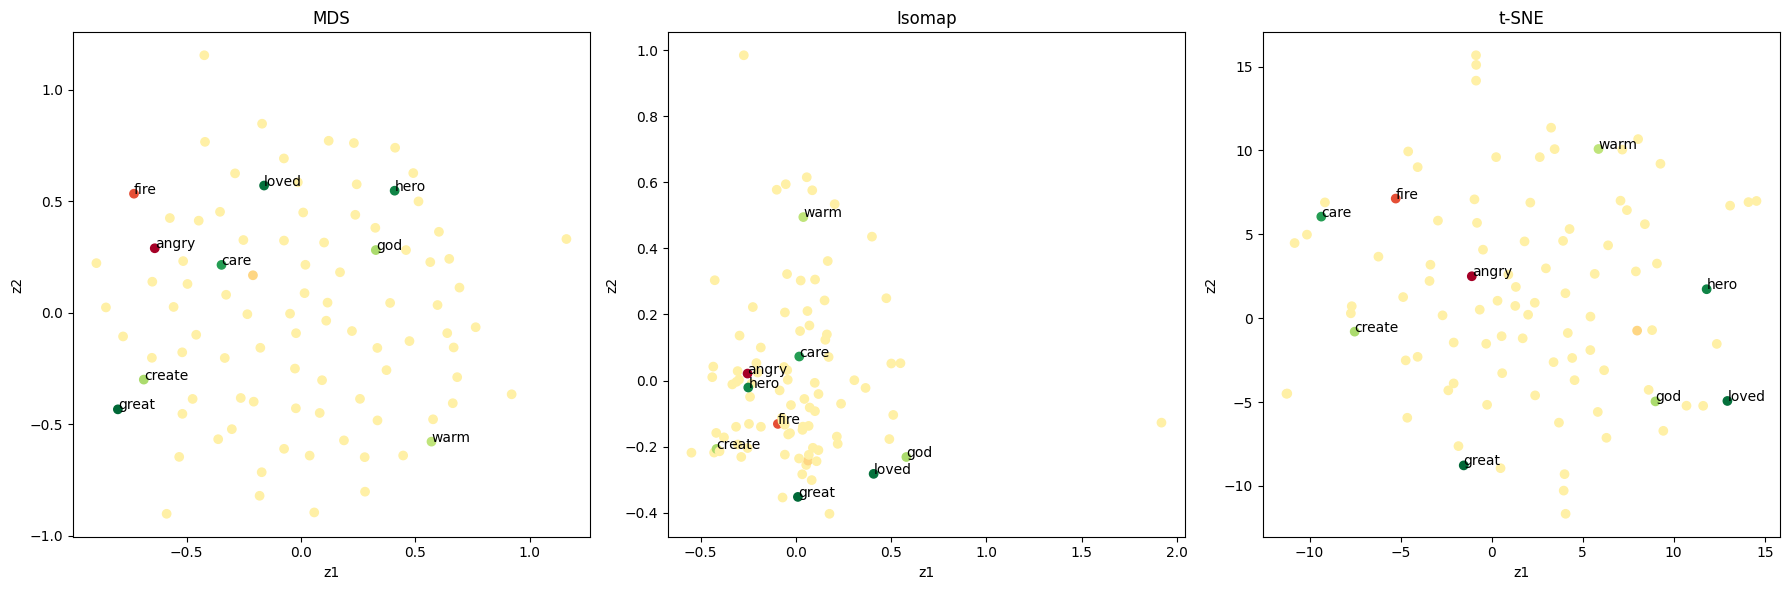

In [7]:
from llm.core.visualization import apply_mds
from llm.core.visualization import apply_isomap
from llm.core.visualization import apply_tsne
from llm.core.visualization import plot_embeddings
import matplotlib.pyplot as plt

# Apply dimensionality reduction
embeddings_mds = apply_mds(embeddings)
embeddings_isomap = apply_isomap(embeddings)
embeddings_tsne = apply_tsne(embeddings)

# Plot the results
fig = plot_embeddings(
    embeddings_list=[embeddings_mds, embeddings_isomap, embeddings_tsne],
    words=words,
    titles=['MDS', 'Isomap', 't-SNE'],
    colors=category_labels
)

plt.savefig(IMAGES_DIR.joinpath('prometheo.jpeg'))